In [214]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [215]:
df=pd.read_excel('Base vente 2020.xlsx')
df.head()

,TYPE,cardcode,cardname,DocNum,DocDate,ZONE1,MODREG,FAMIL,FAMIL2,SFAMIL,...,itemcode,Dscription,PU,AvgPrice,Remise,quantity,MTHT,TTC,Marge,Zone Carrosserie
0,F,C0000103,SOCIETE KAKOUR PIECES AUTOS,2020101191,2020-01-06,CASASUD,ESP,19.0,AMORTISSEURS,19_01,...,B7551807,Amortisseur Gas-A-Just - AR - G/D,1,2,0.0,2.0,2.0,2.4,0.0,CASASUD
1,F,C0000103,SOCIETE KAKOUR PIECES AUTOS,2020102243,2020-01-10,CASASUD,ESP,22.0,FILTRE,22_05,...,PFAH415-2,FILTRE HABITACLE,1,2,0.0,1.0,1.0,2.4,0.0,CASASUD
2,F,C0000103,SOCIETE KAKOUR PIECES AUTOS,2020102243,2020-01-10,CASASUD,ESP,4.0,FREINAGE,04_04,...,B6202-696,MAITRE CYLINDRE DE FREIN,1,2,0.0,1.0,1.0,2.4,0.0,CASASUD
3,F,C0000103,SOCIETE KAKOUR PIECES AUTOS,2020102765,2020-01-14,CASASUD,ESP,22.0,FILTRE,22_04,...,G5OX 420D,"FILTRE A HUILE H=127,5/D=76",1,2,0.0,1.0,1.0,2.4,0.0,CASASUD
4,F,C0000103,SOCIETE KAKOUR PIECES AUTOS,2020103609,2020-01-17,CASASUD,ESP,22.0,FILTRE,22_01,...,G5LX 2864,FILTRE A AIR,1,2,0.0,2.0,2.0,2.4,0.0,CASASUD


In [216]:
df=df.copy()

In [217]:
df.sort_values(by=['itemcode'], inplace=True)
df.head()

,TYPE,cardcode,cardname,DocNum,DocDate,ZONE1,MODREG,FAMIL,FAMIL2,SFAMIL,...,itemcode,Dscription,PU,AvgPrice,Remise,quantity,MTHT,TTC,Marge,Zone Carrosserie
59067,F,C0002222,M'BARKI PIECES AUTOS,2020203061,2020-06-23,RABAT,TRT60,27.0,POMPES,27_03,...,01247058,Pompe à carburant,1,2,0.0,1.0,1.0,2.4,0.234143,RABAT
33907,F,C0001594,BEMA PA SARL,2020129431,2020-07-16,CASANORD,TRT90,27.0,POMPES,27_03,...,01247058,Pompe à carburant,1,2,0.0,1.0,1.0,2.4,0.234143,CASANORD
37568,F,C0001738,PIECES AUTOS BOULMIRATE,2020128537,2020-07-13,CASANORD,CHQ90,27.0,POMPES,27_03,...,01247058,Pompe à carburant,1,2,0.0,1.0,1.0,2.4,0.234143,CASANORD
106246,F,C0005307,ETS BENDRISS ABDELWAHAB,2020101593,2020-01-07,OUJDA,CHQ90,27.0,POMPES,27_03,...,01247069,Pompe à carburant,1,2,0.0,1.0,1.0,2.4,0.198865,OUJDA
74042,F,C0005320,PIECES AUTOS ARABAT OMAR,2020108910,2020-02-11,OUJDA,CHQ45,27.0,POMPES,27_03,...,01247071,Pompe à carburant,1,2,0.0,1.0,1.0,2.4,0.209322,OUJDA


In [218]:
df1=df.loc[:,['cardname', 'FAMIL','SFAMIL','itemcode','quantity','DocDate','Dscription'] ].copy()
df1.head()

,cardname,FAMIL,SFAMIL,itemcode,quantity,DocDate,Dscription
59067,M'BARKI PIECES AUTOS,27.0,27_03,01247058,1.0,2020-06-23,Pompe à carburant
33907,BEMA PA SARL,27.0,27_03,01247058,1.0,2020-07-16,Pompe à carburant
37568,PIECES AUTOS BOULMIRATE,27.0,27_03,01247058,1.0,2020-07-13,Pompe à carburant
106246,ETS BENDRISS ABDELWAHAB,27.0,27_03,01247069,1.0,2020-01-07,Pompe à carburant
74042,PIECES AUTOS ARABAT OMAR,27.0,27_03,01247071,1.0,2020-02-11,Pompe à carburant


In [219]:
df2=df1.set_index(['cardname'])
df2.head()

,FAMIL,SFAMIL,itemcode,quantity,DocDate,Dscription
cardname,,,,,,
M'BARKI PIECES AUTOS,27.0,27_03,01247058,1.0,2020-06-23,Pompe à carburant
BEMA PA SARL,27.0,27_03,01247058,1.0,2020-07-16,Pompe à carburant
PIECES AUTOS BOULMIRATE,27.0,27_03,01247058,1.0,2020-07-13,Pompe à carburant
ETS BENDRISS ABDELWAHAB,27.0,27_03,01247069,1.0,2020-01-07,Pompe à carburant
PIECES AUTOS ARABAT OMAR,27.0,27_03,01247071,1.0,2020-02-11,Pompe à carburant


In [220]:
counts=df1.cardname.value_counts()
df1_final=df1[df1.cardname.isin(counts[counts>=1500].index)]
print('Number de clients qui ont acheté plus de 1500 articles =', len(df1_final))
print('Number of unique users in the final data = ', df1_final['cardname'].nunique())
print('Number of unique products in the final data = ', df1_final['cardname'].nunique())

Number de clients qui ont acheté plus de 1500 articles = 30066
Number of unique users in the final data =  13
Number of unique products in the final data =  13


In [221]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(df1_final, test_size = 0.3, random_state=0)
train_data.head()

,cardname,FAMIL,SFAMIL,itemcode,quantity,DocDate,Dscription
24756,TOTAL PIECES AUTOS S.A,22.0,22_03,G5KX 192D,1.0,2020-01-07,FILTRE A GASOIL
142158,GERMAN AUTO PARTS,90.0,90_01,M26155210015,4.0,2020-01-07,Disque de frein AV
36132,MAROC EQUIPEMENT AUTOS,12.0,12_01,39G8,1.0,2020-03-03,Batterie - Varta - Blue Dynamic - 830A - 95AH ...
181632,GERMAN AUTO PARTS,90.0,90_01,HUP466,1.0,2020-06-12,Pompe à eau
35729,MAROC EQUIPEMENT AUTOS,22.0,22_01,PFA379,2.0,2020-02-14,FILTRE A AIR


In [222]:
train_data.shape
test_data.shape

(21046, 7)

(9020, 7)

In [223]:
matrix = train_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','itemcode','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix

FAMIL                                     1.0                                \
SFAMIL                                   01_01                                
itemcode                              14265315                     14804510   
Dscription                  Butée de débrayage Butée hydraulique, embrayage   
cardname                                                                      
ETS SALAM PIECES AUTOS                     0.0                          0.0   
EXTRA FORT 1                               0.0                          0.0   
GERMAN AUTO PARTS                          0.0                          0.0   
MAROC EQUIPEMENT AUTOS                     0.0                          0.0   
MRAYZIG PIECES AUTOS                       0.0                          0.0   
S O H A M A F SARL                         0.0                          0.0   
STE AFKIR   P.  A.                         0.0                          0.0   
STE B A H E J  PIECES AUTOS                1.0                          0.0   
TOTAL PIECES AUTOS S.A                     0.0                          0.0   
VALENCIA POIDS LOURDS                      0.0                          0.0   
VENTES AU COMPTANT BPA                     0.0                          0.0   
VENTES AU COMPTANT HF                      0.0                          0.0   
VENTES AU COMPTANT IF                      0.0                          1.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804513   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         0.0   
GERMAN AUTO PARTS                                    0.0   
MAROC EQUIPEMENT AUTOS                               0.0   
MRAYZIG PIECES AUTOS                                 0.0   
S O H A M A F SARL                                   0.0   
STE AFKIR   P.  A.                                   0.0   
STE B A H E J  PIECES AUTOS                          1.0   
TOTAL PIECES AUTOS S.A                               0.0   
VALENCIA POIDS LOURDS                                0.0   
VENTES AU COMPTANT BPA                               0.0   
VENTES AU COMPTANT HF                                1.0   
VENTES AU COMPTANT IF                                0.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804526   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         0.0   
GERMAN AUTO PARTS                                    0.0   
MAROC EQUIPEMENT AUTOS                               0.0   
MRAYZIG PIECES AUTOS                                 0.0   
S O H A M A F SARL                                   0.0   
STE AFKIR   P.  A.                                   1.0   
STE B A H E J  PIECES AUTOS                          0.0   
TOTAL PIECES AUTOS S.A                               0.0   
VALENCIA POIDS LOURDS                                0.0   
VENTES AU COMPTANT BPA                               0.0   
VENTES AU COMPTANT HF                                0.0   
VENTES AU COMPTANT IF                                0.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804527   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         1.

In [224]:
matrix_train = train_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','itemcode','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix_train
matrix_test=test_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','itemcode','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix_test

FAMIL                                     1.0                                \
SFAMIL                                   01_01                                
itemcode                              14265315                     14804510   
Dscription                  Butée de débrayage Butée hydraulique, embrayage   
cardname                                                                      
ETS SALAM PIECES AUTOS                     0.0                          0.0   
EXTRA FORT 1                               0.0                          0.0   
GERMAN AUTO PARTS                          0.0                          0.0   
MAROC EQUIPEMENT AUTOS                     0.0                          0.0   
MRAYZIG PIECES AUTOS                       0.0                          0.0   
S O H A M A F SARL                         0.0                          0.0   
STE AFKIR   P.  A.                         0.0                          0.0   
STE B A H E J  PIECES AUTOS                1.0                          0.0   
TOTAL PIECES AUTOS S.A                     0.0                          0.0   
VALENCIA POIDS LOURDS                      0.0                          0.0   
VENTES AU COMPTANT BPA                     0.0                          0.0   
VENTES AU COMPTANT HF                      0.0                          0.0   
VENTES AU COMPTANT IF                      0.0                          1.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804513   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         0.0   
GERMAN AUTO PARTS                                    0.0   
MAROC EQUIPEMENT AUTOS                               0.0   
MRAYZIG PIECES AUTOS                                 0.0   
S O H A M A F SARL                                   0.0   
STE AFKIR   P.  A.                                   0.0   
STE B A H E J  PIECES AUTOS                          1.0   
TOTAL PIECES AUTOS S.A                               0.0   
VALENCIA POIDS LOURDS                                0.0   
VENTES AU COMPTANT BPA                               0.0   
VENTES AU COMPTANT HF                                1.0   
VENTES AU COMPTANT IF                                0.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804526   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         0.0   
GERMAN AUTO PARTS                                    0.0   
MAROC EQUIPEMENT AUTOS                               0.0   
MRAYZIG PIECES AUTOS                                 0.0   
S O H A M A F SARL                                   0.0   
STE AFKIR   P.  A.                                   1.0   
STE B A H E J  PIECES AUTOS                          0.0   
TOTAL PIECES AUTOS S.A                               0.0   
VALENCIA POIDS LOURDS                                0.0   
VENTES AU COMPTANT BPA                               0.0   
VENTES AU COMPTANT HF                                0.0   
VENTES AU COMPTANT IF                                0.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804527   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         1.

FAMIL                                               1.0   \
SFAMIL                                             01_01   
itemcode                                        14804527   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         0.0   
GERMAN AUTO PARTS                                    0.0   
MAROC EQUIPEMENT AUTOS                               1.0   
MRAYZIG PIECES AUTOS                                 3.0   
S O H A M A F SARL                                   1.0   
STE AFKIR   P.  A.                                   4.0   
STE B A H E J  PIECES AUTOS                          0.0   
TOTAL PIECES AUTOS S.A                               0.0   
VALENCIA POIDS LOURDS                                0.0   
VENTES AU COMPTANT BPA                               1.0   
VENTES AU COMPTANT HF                                0.0   
VENTES AU COMPTANT IF                                0.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804528   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               1.0   
EXTRA FORT 1                                         0.0   
GERMAN AUTO PARTS                                    0.0   
MAROC EQUIPEMENT AUTOS                               0.0   
MRAYZIG PIECES AUTOS                                 0.0   
S O H A M A F SARL                                   3.0   
STE AFKIR   P.  A.                                   0.0   
STE B A H E J  PIECES AUTOS                          0.0   
TOTAL PIECES AUTOS S.A                               0.0   
VALENCIA POIDS LOURDS                                0.0   
VENTES AU COMPTANT BPA                               0.0   
VENTES AU COMPTANT HF                                0.0   
VENTES AU COMPTANT IF                                3.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804538   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         0.0   
GERMAN AUTO PARTS                                    0.0   
MAROC EQUIPEMENT AUTOS                               0.0   
MRAYZIG PIECES AUTOS                                 0.0   
S O H A M A F SARL                                   0.0   
STE AFKIR   P.  A.                                   0.0   
STE B A H E J  PIECES AUTOS                          0.0   
TOTAL PIECES AUTOS S.A                               0.0   
VALENCIA POIDS LOURDS                                0.0   
VENTES AU COMPTANT BPA                               0.0   
VENTES AU COMPTANT HF                                0.0   
VENTES AU COMPTANT IF                                1.0   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804544   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                               0.0   
EXTRA FORT 1                                         0.0   
GERMAN AUTO PARTS                                    0.0   
MAROC EQUIPEMENT AUTOS                               1.0   
MRAYZIG PIECES AUTOS                                 1.0   
S O H A M A F SARL                                   4.0   
STE AFKIR   P.  A.                                   1.0   
STE B A H E J  PIECES AUTOS          

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
matrix_train2 = train_data.pivot_table(index = 'cardname', columns =['FAMIL','DocDate','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix_test2 = test_data.pivot_table(index = 'cardname', columns =['FAMIL','DocDate','Dscription'], values = 'quantity', aggfunc=len).fillna(0)

In [227]:
matrix_train3 = train_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','itemcode','DocDate','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix_test3 = test_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','itemcode','DocDate','Dscription'], values = 'quantity', aggfunc=len).fillna(0)

In [228]:
matrix_train4 = train_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','DocDate','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix_test4 = test_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','DocDate','Dscription'], values = 'quantity', aggfunc=len).fillna(0)

In [229]:
matrix_train5 = train_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix_test5 = test_data.pivot_table(index = 'cardname', columns =['FAMIL','SFAMIL','Dscription'], values = 'quantity', aggfunc=len).fillna(0)

In [230]:
matrix_train6 = train_data.pivot_table(index = 'cardname', columns =['FAMIL','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix_test6 = test_data.pivot_table(index = 'cardname', columns =['FAMIL','Dscription'], values = 'quantity', aggfunc=len).fillna(0)

In [231]:
matrix_train7 = train_data.pivot_table(index = 'cardname', columns =['itemcode','Dscription'], values = 'quantity', aggfunc=len).fillna(0)
matrix_test7 = test_data.pivot_table(index = 'cardname', columns =['itemcode','Dscription'], values = 'quantity', aggfunc=len).fillna(0)

In [232]:
list_matrix=[matrix_train,matrix_train2,matrix_train3,matrix_train4,matrix_train5,matrix_train6,matrix_train7]
list_matrix2= [matrix_test, matrix_test2, matrix_test3,matrix_test4,matrix_test5,matrix_test6,matrix_test7]

In [233]:
list_matrix_train=[]
list_matrix_test=[]
for ma, mo in zip(list_matrix, list_matrix2):
    scaler=StandardScaler()
    maa=scaler.fit_transform(ma)
    maa=pd.DataFrame(maa, index=ma.index, columns=ma.columns)
    list_matrix_train.append(maa)
    moo=scaler.fit_transform(mo)
    moo=pd.DataFrame(moo,index=ma.index, columns=mo.columns)
    list_matrix_test.append(moo)
    
list_matrix_train
list_matrix_test


[FAMIL                                     1.0                                \
 SFAMIL                                   01_01                                
 itemcode                              14265315                     14804510   
 Dscription                  Butée de débrayage Butée hydraulique, embrayage   
 cardname                                                                      
 ETS SALAM PIECES AUTOS               -0.288675                    -0.288675   
 EXTRA FORT 1                         -0.288675                    -0.288675   
 GERMAN AUTO PARTS                    -0.288675                    -0.288675   
 MAROC EQUIPEMENT AUTOS               -0.288675                    -0.288675   
 MRAYZIG PIECES AUTOS                 -0.288675                    -0.288675   
 S O H A M A F SARL                   -0.288675                    -0.288675   
 STE AFKIR   P.  A.                   -0.288675                    -0.288675   
 STE B A H E J  PIECES AUTOS           3

[FAMIL                                               1.0   \
 SFAMIL                                             01_01   
 itemcode                                        14804527   
 Dscription                  Butée hydraulique, embrayage   
 cardname                                                   
 ETS SALAM PIECES AUTOS                         -0.615457   
 EXTRA FORT 1                                   -0.615457   
 GERMAN AUTO PARTS                              -0.615457   
 MAROC EQUIPEMENT AUTOS                          0.184637   
 MRAYZIG PIECES AUTOS                            1.784827   
 S O H A M A F SARL                              0.184637   
 STE AFKIR   P.  A.                              2.584921   
 STE B A H E J  PIECES AUTOS                    -0.615457   
 TOTAL PIECES AUTOS S.A                         -0.615457   
 VALENCIA POIDS LOURDS                          -0.615457   
 VENTES AU COMPTANT BPA                          0.184637   
 VENTES AU COMPTANT HF  

In [234]:
list_matrix_train[0]

FAMIL                                     1.0                                \
SFAMIL                                   01_01                                
itemcode                              14265315                     14804510   
Dscription                  Butée de débrayage Butée hydraulique, embrayage   
cardname                                                                      
ETS SALAM PIECES AUTOS               -0.288675                    -0.288675   
EXTRA FORT 1                         -0.288675                    -0.288675   
GERMAN AUTO PARTS                    -0.288675                    -0.288675   
MAROC EQUIPEMENT AUTOS               -0.288675                    -0.288675   
MRAYZIG PIECES AUTOS                 -0.288675                    -0.288675   
S O H A M A F SARL                   -0.288675                    -0.288675   
STE AFKIR   P.  A.                   -0.288675                    -0.288675   
STE B A H E J  PIECES AUTOS           3.464102                    -0.288675   
TOTAL PIECES AUTOS S.A               -0.288675                    -0.288675   
VALENCIA POIDS LOURDS                -0.288675                    -0.288675   
VENTES AU COMPTANT BPA               -0.288675                    -0.288675   
VENTES AU COMPTANT HF                -0.288675                    -0.288675   
VENTES AU COMPTANT IF                -0.288675                     3.464102   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804513   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                         -0.426401   
EXTRA FORT 1                                   -0.426401   
GERMAN AUTO PARTS                              -0.426401   
MAROC EQUIPEMENT AUTOS                         -0.426401   
MRAYZIG PIECES AUTOS                           -0.426401   
S O H A M A F SARL                             -0.426401   
STE AFKIR   P.  A.                             -0.426401   
STE B A H E J  PIECES AUTOS                     2.345208   
TOTAL PIECES AUTOS S.A                         -0.426401   
VALENCIA POIDS LOURDS                          -0.426401   
VENTES AU COMPTANT BPA                         -0.426401   
VENTES AU COMPTANT HF                           2.345208   
VENTES AU COMPTANT IF                          -0.426401   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804526   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                         -0.288675   
EXTRA FORT 1                                   -0.288675   
GERMAN AUTO PARTS                              -0.288675   
MAROC EQUIPEMENT AUTOS                         -0.288675   
MRAYZIG PIECES AUTOS                           -0.288675   
S O H A M A F SARL                             -0.288675   
STE AFKIR   P.  A.                              3.464102   
STE B A H E J  PIECES AUTOS                    -0.288675   
TOTAL PIECES AUTOS S.A                         -0.288675   
VALENCIA POIDS LOURDS                          -0.288675   
VENTES AU COMPTANT BPA                         -0.288675   
VENTES AU COMPTANT HF                          -0.288675   
VENTES AU COMPTANT IF                          -0.288675   

FAMIL                                                     \
SFAMIL                                                     
itemcode                                        14804527   
Dscription                  Butée hydraulique, embrayage   
cardname                                                   
ETS SALAM PIECES AUTOS                         -1.034867   
EXTRA FORT 1                                   -0.69853

In [318]:
#SINGULAR VALUE DECOMPOSITION
U=[]
Sigma=[]
Vt=[]
for ma in list_matrix_train:
    u, sigma, vt = svds(ma, k = 12)
    U.append(u)
    Sigma.append(sigma)
    Vt.append(vt)


In [319]:
print('Left singular matrix: \n',U)

Left singular matrix: 
 [array([[ 1.28121447e-01,  4.66385885e-01, -7.94396388e-01,
        -1.31822693e-01,  8.12488746e-02, -3.92598113e-02,
        -8.76076830e-02,  1.22466655e-01,  5.25736820e-02,
        -2.51987121e-02,  3.22210854e-02,  7.38248969e-02],
       [ 7.92416472e-02,  1.72013645e-01,  4.27797980e-01,
        -6.92562632e-01,  3.65141086e-01, -1.29751101e-01,
        -1.76289479e-01,  1.38974979e-01,  1.26672731e-01,
        -8.52234466e-03,  3.86079510e-02,  7.99393990e-02],
       [ 8.26944809e-03,  1.09423427e-02,  1.07824229e-02,
         2.54506245e-03, -4.05836122e-03,  5.82081572e-04,
         8.17832620e-03, -1.46912753e-02,  7.63055872e-04,
        -2.13908229e-03, -1.59984425e-02, -9.60315277e-01],
       [-8.93244279e-01, -2.70056802e-01, -1.56697995e-01,
        -6.62289808e-02,  6.58417083e-02, -3.36744370e-02,
        -6.98158893e-02,  8.85988135e-02,  2.30132632e-02,
        -1.83213220e-02,  4.40633621e-03,  6.51349463e-02],
       [ 4.22857004e-02,  3

In [320]:
print('Sigma: \n',Sigma)

Sigma: 
 [array([ 59.6009744 ,  66.16462452,  72.47378887,  76.41287498,
        79.95716781,  80.45800191,  83.02812272,  87.16164264,
        92.12118772,  93.87608123, 101.91880004, 177.3940677 ]), array([ 85.96190453,  88.28787665,  92.11761912,  98.61424528,
       100.53802131, 101.76487043, 104.81381292, 106.7962578 ,
       119.0849822 , 127.36127391, 133.30840159, 162.12884083]), array([118.04575514, 119.82491099, 122.11022961, 123.14953689,
       125.40584132, 130.51097763, 137.93086741, 150.11545048,
       159.07849434, 160.43166184, 160.94283577, 218.52066022]), array([ 86.79068011,  89.07399653,  92.93248423,  99.48101205,
       101.50364273, 102.45889274, 105.93071791, 107.96355522,
       120.50336579, 129.13459704, 134.22068161, 163.57574841]), array([29.14254734, 32.27918315, 33.3320175 , 36.51197259, 37.06093037,
       38.54240701, 40.23998757, 41.596431  , 44.55236568, 46.13126256,
       63.68609899, 88.65181041]), array([27.92605672, 31.16627952, 32.14207224, 3

In [321]:
# Construct diagonal array in SVD
Sigmaa=[]
for sigma in Sigma:
    sigma = np.diag(sigma)
    Sigmaa.append(sigma)
    
Sigmaa


[array([[ 59.6009744 ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,  66.16462452,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,  72.47378887,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,  76.41287498,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
          79.95716781,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.       

In [322]:
print('Right singular matrix: \n',Vt)

Right singular matrix: 
 [array([[ 7.53506131e-04,  4.11319249e-03,  7.50103810e-04, ...,
         5.20685993e-04,  5.20685993e-04,  5.20685993e-04],
       [ 4.63272939e-03,  1.37201222e-03,  4.48782785e-03, ...,
         6.20636323e-04,  6.20636323e-04,  6.20636323e-04],
       [ 5.47811192e-03,  7.11663099e-03,  4.35642142e-03, ...,
         5.58326350e-04,  5.58326350e-04,  5.58326350e-04],
       ...,
       [-4.19856269e-03,  4.25071910e-03,  2.01042486e-02, ...,
        -8.55116467e-05, -8.55116467e-05, -8.55116467e-05],
       [ 2.97677553e-03,  3.62261313e-03,  7.02927003e-03, ...,
        -5.89082513e-04, -5.89082513e-04, -5.89082513e-04],
       [ 1.78321832e-03,  1.64430043e-03,  2.63192871e-03, ...,
        -2.03154981e-02, -2.03154981e-02, -2.03154981e-02]]), array([[-6.83525810e-04, -5.71005497e-04, -1.70975176e-03, ...,
         2.12605140e-05,  2.12605140e-05,  2.12605140e-05],
       [ 8.54400569e-04,  1.17989658e-03,  1.17198847e-03, ...,
         4.63385975e-05,  4.

In [324]:
def rmse(prediction, ground_truth):
    rmse_df=pd.concat([ground_truth.mean(), prediction.mean()], axis=1)
    rmse_df.columns = ['Avg_actual', 'Avg_predicted']
    #prediction = prediction[ground_truth.to_numpy().nonzero()].flatten() 
    #ground_truth = ground_truth[ground_truth.to_numpy().nonzero()].flatten()
    return (((rmse_df.Avg_actual - rmse_df.Avg_predicted) ** 2).mean() ** 0.5)

In [329]:
class Recommender:
    
    
  
    def __init__(self, n_epochs=66, n_latent_features=12, lmbda=0.1, learning_rate=0.001):
        
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate
  
    def predictions(self, P, Q):
        return np.dot(np.dot(P, Sigmaa[2]), Q)
  
    def fit(self, x_train, x_test):
        m, n = x_train.shape

        #self.P = 3 * np.random.rand(self.n_latent_features, m)
        #self.Q = 3 * np.random.rand(self.n_latent_features, n)
        self.P= U[2]
        self.Q=Vt[2]
        
    
        self.train_error = []
        self.val_error = []
        

        users, items = x_train.to_numpy().nonzero()
    
        for epoch in range(self.n_epochs):
            for u, i in zip(users, items):
                error = x_train.iloc[u, i] - self.predictions(self.P[u,:], self.Q[:,i])
                self.P[u,:] += self.learning_rate * (error * self.Q[:, i] - self.lmbda * self.P[u,:])
                self.Q[:, i] += self.learning_rate * (error * self.P[u,:] - self.lmbda * self.Q[:, i])
            y_hat = self.predictions(self.P, self.Q)
            predss_df = pd.DataFrame(y_hat, columns = x_train.columns)
            train_rmse = rmse(predss_df, x_train)
            val_rmse = rmse(predss_df, x_test)
            self.train_error.append(train_rmse)
            self.val_error.append(val_rmse)
    
        
        return self
  
    def predict(self, x_train):
        y_hat = self.predictions(self.P, self.Q)
        preds_df = pd.DataFrame(y_hat, columns = x_train.columns)
        #predictions_index = np.where(X_train[user_index, :] == 0)[0]
        return preds_df
  

In [330]:
recommender=Recommender().fit(list_matrix_train[2],list_matrix_test[2])

Text(0.5, 0, 'Number of Epochs')

Text(0, 0.5, 'RMSE')

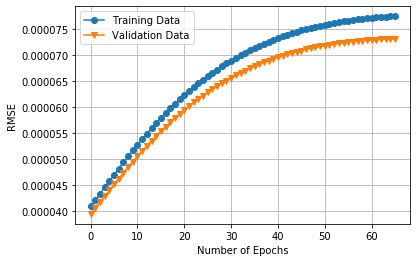

In [331]:
plt.plot(range(recommender.n_epochs), recommender.train_error, marker='o', label='Training Data');
plt.plot(range(recommender.n_epochs), recommender.val_error, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [328]:
U[2]

array([[-6.39975198e-02,  1.73114199e-02, -5.85634486e-03,
         6.23873488e-04, -6.22052236e-03,  9.12390888e-03,
         9.32171005e-03, -1.35290774e-02, -3.37464550e-03,
         2.58206778e-04, -2.53199515e-04, -1.82413613e-02],
       [ 7.81105544e-03, -1.13600105e-02,  2.73248980e-02,
        -5.67360732e-02, -2.33370772e-02,  1.61496523e-02,
         1.20595525e-02, -1.55003472e-02, -3.77784817e-03,
         9.23183553e-04, -2.33203107e-04, -1.83866178e-02],
       [ 1.57102651e-04, -2.79668104e-03,  7.43520192e-04,
         1.72253026e-05,  2.92976313e-03, -2.49156500e-03,
        -5.10411056e-03,  9.00668390e-03, -2.60451504e-03,
         2.48128394e-03, -1.47889630e-03,  2.34148685e-01],
       [ 4.74367546e-03, -3.81582896e-02, -4.70270063e-02,
         5.22500801e-03, -1.39814670e-02,  1.12492230e-02,
         1.05109264e-02, -1.37390990e-02, -2.77180382e-03,
         8.26090036e-04, -1.57169308e-04, -1.81657695e-02],
       [ 5.39565288e-04, -1.06486411e-03,  7.8284227

In [314]:
predictions= recommender.predict(list_matrix_train[2])
predictions

FAMIL                              1.0                                \
DocDate                      2020-01-01                                
Dscription Butée hydraulique, embrayage Cylindre émetteur, embrayage   
0                             -0.083400                    -0.055384   
1                             -0.096522                    -0.066951   
2                             -0.349392                    -0.259829   
3                             -0.103206                    -0.066509   
4                              0.517411                    -0.129448   
5                              0.410192                     0.550116   
6                             -0.090685                    -0.055498   
7                             -0.099921                    -0.060921   
8                             -0.091166                    -0.061490   
9                             -0.060486                    -0.032818   
10                            -0.103096                    -0.070799   
11                            -0.155644                    -0.105132   
12                             0.306158                     0.415127   

FAMIL                                       \
DocDate                                      
Dscription KIT D'EMBRAYAGE Kit d'embrayage   
0                -0.011387       -0.058943   
1                -0.025861       -0.082303   
2                -0.164455       -0.380947   
3                -0.030432       -0.081417   
4                -0.068948       -0.172437   
5                -0.046412       -0.125582   
6                 0.520020        0.102284   
7                -0.026093        0.109880   
8                -0.023955        0.084282   
9                -0.005499       -0.036499   
10               -0.025869       -0.079520   
11               -0.061897        0.184647   
12               -0.029167        0.537683   

FAMIL                                                    \
DocDate                                                   
Dscription Kit d'embrayage 4P Ø: 228 mm, Nbr. dents: 28   
0                                             -0.045415   
1                                             -0.053225   
2                                             -0.184473   
3                                             -0.055746   
4                                             -0.096350   
5                                              0.805466   
6                                             -0.046442   
7                                             -0.041618   
8                                             -0.045673   
9                                             -0.032884   
10                                            -0.060693   
11                                            -0.083173   
12                                            -0.059965   

FAMIL                                                           \
DocDate                                                          
Dscription Kit d'embrayage Ø: 200 mm Kit d'embrayage Ø: 180 mm   
0                          -0.011403                 -0.021599   
1                          -0.025882                 -0.031097   
2                          -0.164519                 -0.170550   
3                          -0.030454                 -0.031705   
4                          -0.068982                 -0.068032   
5                          -0.046473                 -0.060583   
6                           0.520265                 -0.025380   
7                          -0.026099                 -0.037549   
8                          -0.023962                 -0.019191   
9                          -0.005511                 -0.014145   
10                         -0.025890                  0.578725   
11                         -0.061906                 -0.063029   
12                         -0.029141                 -0.035468   

FAMIL                                                           \
DocDate                                   

In [ ]:
def predict(x_train):
    y_hat = np.dot(np.dot(P, Sigmaa[2]), Q)
    preds_df = pd.DataFrame(y_hat, columns = x_train.columns)
    #predictions_index = np.where(X_train[user_index, :] == 0)[0]
    return preds_df
        

In [ ]:
p=predict(list_matrix_train[2])
print(p)

In [295]:
#define user index from 0 to 10
matrix['user_index'] = np.arange(0, ma.shape[0], 1)
matrixx=matrix.loc[:,['user_index', 'cardname']]
matrixx

FAMIL,user_index
SFAMIL,
itemcode,
Dscription,
cardname,
ETS SALAM PIECES AUTOS,0
EXTRA FORT 1,1
GERMAN AUTO PARTS,2
MAROC EQUIPEMENT AUTOS,3
MRAYZIG PIECES AUTOS,4
S O H A M A F SARL,5


In [296]:
list_num_client=[]
for liste_clients in l_liste_clients:
    num_client=matrixx.loc[liste_clients]['user_index']
    list_num_client.append(num_client)
len(num_client)   
#list_num_client 


10

In [316]:
def recommend_itemss(userID, x_train, num_recommendations):
    
    # index starts at 0  
    user_cardname = userID-1 
    client=x_train.iloc[user_cardname]
    similar_to_client=x_train.corrwith(client, axis=1, method='pearson')
    corr_client=pd.DataFrame(similar_to_client,columns=['similarité'])
    corr_client.dropna(inplace=True)
    co=corr_client.sort_values('similarité', ascending=False).head(num_recommendations)
    co=co.reset_index()
    liste_clients=co['cardname'].unique()
    #define user index from 0 to 10
    matrix['user_index'] = np.arange(0, ma.shape[0], 1)
    matrixx=matrix.loc[:,['user_index', 'cardname']]
    num_client=matrixx.loc[liste_clients]['user_index']
    # Get and sort the user's ratings
    for i in range(1,len(num_client)):
        sorted_user_ratings = x_train.iloc[num_client[i]].sort_values(ascending=False)
        #sorted_user_ratings
        sorted_user_predictions = predictions.iloc[num_client[i]].sort_values(ascending=False)
        #sorted_user_predictions
        temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
        temp.index.name = 'Recommended Items'
        temp.columns = ['user_achat', 'user_pred']
        #temp = temp.loc[temp.user_achat == 0]   
        temp = temp.sort_values('user_pred', ascending=False)
        print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
        print(temp.head(num_recommendations))
        
    

In [317]:
userID = 3
#pred_df=predictions
num_recommendations=5
recommend_itemss( userID, list_matrix_train[1],num_recommendations)



Below are the recommended items for user(user_id = 3):

                                                       user_achat  user_pred
FAMIL DocDate    Dscription                                                 
10.0  2020-03-07 support, suspension du moteur           3.464102   0.413758
                 rotule de suspension                    3.464102   0.413580
                 kit de rÚparation,rotule de suspensi    3.464102   0.413401
                 bras de liaison                         3.464102   0.413222
                 barre stabilisatrice                    3.464102   0.413043

Below are the recommended items for user(user_id = 3):

                              user_achat  user_pred
FAMIL DocDate    Dscription                        
27.0  2020-03-10 Pompe à eau    3.464102   0.530793
      2020-03-07 Pompe à eau    3.464102   0.530567
      2020-03-06 Pompe à eau    3.464102   0.530326
      2020-06-12 Thermostats    3.464102   0.530269
      2020-02-26 POMPE A EAU    3.4

In [212]:
for u in list_num_client[0]+1:
    userID = u
    pred_df=predictions
    num_recommendations=5
    recommend_items( userID, list_matrix_train[0],num_recommendations)




Below are the recommended items for user(user_id = 3):

                                                          user_achat  \
FAMIL SFAMIL itemcode    Dscription                                    
1.0   01_01  66510009010 Butée hydraulique embrayage             0.0   
      01_04  66623353400 Kit d'embrayage Ø: 230 mm               0.0   
3.0   22_03  PFFCS733    FILTRE A GASOIL                         0.0   
4.0   04_01  B8GDB 1670  Kit de plaquettes de frein - AV         0.0   

                                                          user_pred  
FAMIL SFAMIL itemcode    Dscription                                  
1.0   01_01  66510009010 Butée hydraulique embrayage      -0.000069  
      01_04  66623353400 Kit d'embrayage Ø: 230 mm        -0.003534  
3.0   22_03  PFFCS733    FILTRE A GASOIL                  -0.009246  
4.0   04_01  B8GDB 1670  Kit de plaquettes de frein - AV  -0.020518  

Below are the recommended items for user(user_id = 4):

                                 

In [176]:
#Predicted
list_preds_df=[]
for i,j,l,ma in zip(U,Sigmaa,Vt,list_matrix):
    all_user_predicted = np.dot(np.dot(i, j), l)
    # Convert predicted ratings to dataframe
    preds_df = pd.DataFrame(all_user_predicted, columns = ma.columns)
    list_preds_df.append(preds_df)
    
list_preds_df
    

[FAMIL                     1.0                               \
 SFAMIL                  01_01                                
 itemcode             14265315                     14804510   
 Dscription Butée de débrayage Butée hydraulique, embrayage   
 0                   -0.061613                     0.036548   
 1                    0.082857                    -0.049150   
 2                    0.001142                    -0.000677   
 3                    0.001761                    -0.001045   
 4                    0.001188                    -0.000705   
 5                    0.003880                    -0.002301   
 6                   -0.009186                     0.005449   
 7                    0.988275                     0.006955   
 8                    0.009066                    -0.005378   
 9                   -0.002023                     0.001200   
 10                  -0.026076                     0.015468   
 11                   0.002403                    -0.00

In [ ]:
# Recommend the items with the highest predicted

def recommend_items(userID, x_train, num_recommendations):
    
    # index starts at 0  
    user_cardname = userID-1 
    # Get and sort the user's ratings
    sorted_user_ratings = x_train.iloc[user_cardname].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = predictions.iloc[user_cardname].sort_values(ascending=False)
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_achat', 'user_pred']
    temp = temp.loc[temp.user_achat == 0]   
    temp = temp.sort_values('user_pred', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [182]:
for user_cardname in list_num_client[6]+1:
    num_recommendations = 5
    recommend_items( user_cardname, list_matrix[6], list_preds_df[6], num_recommendations)
    



Below are the recommended items for user(user_id = 3):

                                                           user_achat  \
itemcode     Dscription                                                 
8309.5802.24 Jeu de Disque de frein AV Ø: 259 mm, 4 trous         0.0   
G84001814    BIELLETTE SUPPORT INF                                0.0   
G5LX 1686/1  FILTRE A AIR L= 176/H=96                             0.0   
B8GDB 3461   Kit de plaquettes de frein - AV                      0.0   
66538008910  Pompe à eau                                          0.0   

                                                           user_pred  
itemcode     Dscription                                               
8309.5802.24 Jeu de Disque de frein AV Ø: 259 mm, 4 trous   0.046523  
G84001814    BIELLETTE SUPPORT INF                          0.034082  
G5LX 1686/1  FILTRE A AIR L= 176/H=96                       0.033868  
B8GDB 3461   Kit de plaquettes de frein - AV                0.030055  
66538